In [33]:
#Set up API 
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd57ef7c5-1b2c-4bb4-bddb-cd40a81d25a8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-28T06:55:56.422Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9987}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11651, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.json_normalize(data['status'])

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974611e+07,1.974611e+07,False,NaN,1,NaN,NaN,None,2024-08-28T06:54:00.000Z,59200.523667,4.154314e+10,46.1804,-0.229984,-5.684117,-0.689106,-14.967057,-2.509049,-12.707996,1.168980e+12,56.1448,1.243211e+12,None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
1,1027,Ethereum,ETH,ethereum,9250,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202987e+08,1.202987e+08,True,NaN,2,NaN,NaN,None,2024-08-28T06:53:00.000Z,2464.247750,2.030006e+10,63.0343,-0.163142,-8.025790,-5.263737,-27.031808,-27.122900,-34.270908,2.964458e+11,14.2412,2.964458e+11,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
2,825,Tether USDt,USDT,tether,95690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.000311,6.914716e+10,32.8871,0.006780,0.019721,0.013573,0.027536,0.185003,0.092391,1.180760e+11,5.6717,1.202937e+11,None,2024-08-28T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:56:00.572240
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-28T06:53:00.000Z,540.526009,1.925578e+09,7.8717,-0.112534,-2.208069,-3.605025,-8.914757,-4.868851,-9.077989,7.888177e+10,3.7890,7.888177e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661553e+08,5.831977e+08,True,NaN,5,NaN,NaN,None,2024-08-28T06:53:00.000Z,147.262382,2.924235e+09,17.1003,-0.345175,-6.831845,2.656273,-23.653615,4.515996,-11.709226,6.864714e+10,3.2986,8.588308e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
5,3408,USDC,USDC,usd-coin,21697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.441812e+10,3.441812e+10,False,NaN,6,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.000019,7.389282e+09,36.6339,-0.001778,0.012764,0.013172,-0.012863,0.012950,-0.013712,3.441879e+10,1.6531,3.441879e+10,None,2024-08-28T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:56:00.572240
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-28T06:54:00.000Z,0.571930,1.566452e+09,49.3280,-0.051753,-3.266209,-4.403052,-5.779905,20.755181,10.395025,3.213108e+10,1.5434,5.719300e+10,None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457175e+11,1.457175e+11,True,NaN,8,NaN,NaN,None,2024-08-28T06:53:00.000Z,0.099148,6.681719e+08,25.9708,-0.328748,-6.330850,-5.050301,-26.372652,-19.575079,-38.255575,1.444757e+10,0.6940,1.444757e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.6815

In [37]:
# Making it automated
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'd57ef7c5-1b2c-4bb4-bddb-cd40a81d25a8',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

      
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

  # This version only stores in dataframes instead of exporting it to csv file
  # to run it, type jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10 in Anaconda Prompt
  # Then click on the link given by the prompt


In [39]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Task successfully completed API Runner')
    sleep(60) #sleep for 1 min
exit()

Task successfully completed API Runner
Task successfully completed API Runner
Task successfully completed API Runner
Task successfully completed API Runner
Task successfully completed API Runner


KeyboardInterrupt: 

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974611e+07,1.974611e+07,False,NaN,1,NaN,NaN,None,2024-08-28T06:54:00.000Z,59200.523667,4.154314e+10,46.1804,-0.229984,-5.684117,-0.689106,-14.967057,-2.509049,-12.707996,1.168980e+12,56.1448,1.243211e+12,None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
1,1027,Ethereum,ETH,ethereum,9250,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202987e+08,1.202987e+08,True,NaN,2,NaN,NaN,None,2024-08-28T06:53:00.000Z,2464.247750,2.030006e+10,63.0343,-0.163142,-8.025790,-5.263737,-27.031808,-27.122900,-34.270908,2.964458e+11,14.2412,2.964458e+11,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
2,825,Tether USDt,USDT,tether,95690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.000311,6.914716e+10,32.8871,0.006780,0.019721,0.013573,0.027536,0.185003,0.092391,1.180760e+11,5.6717,1.202937e+11,None,2024-08-28T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:56:00.572240
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-28T06:53:00.000Z,540.526009,1.925578e+09,7.8717,-0.112534,-2.208069,-3.605025,-8.914757,-4.868851,-9.077989,7.888177e+10,3.7890,7.888177e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661553e+08,5.831977e+08,True,NaN,5,NaN,NaN,None,2024-08-28T06:53:00.000Z,147.262382,2.924235e+09,17.1003,-0.345175,-6.831845,2.656273,-23.653615,4.515996,-11.709226,6.864714e+10,3.2986,8.588308e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
5,3408,USDC,USDC,usd-coin,21697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.441812e+10,3.441812e+10,False,NaN,6,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.000019,7.389282e+09,36.6339,-0.001778,0.012764,0.013172,-0.012863,0.012950,-0.013712,3.441879e+10,1.6531,3.441879e+10,None,2024-08-28T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:56:00.572240
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-28T06:54:00.000Z,0.571930,1.566452e+09,49.3280,-0.051753,-3.266209,-4.403052,-5.779905,20.755181,10.395025,3.213108e+10,1.5434,5.719300e+10,None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457175e+11,1.457175e+11,True,NaN,8,NaN,NaN,None,2024-08-28T06:53:00.000Z,0.099148,6.681719e+08,25.9708,-0.328748,-6.330850,-5.050301,-26.372652,-19.575079,-38.255575,1.444757e+10,0.6940,1.444757e+10,None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.6815

In [45]:
# Another way to remove scientific notation:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...","21,000,000.00","19,746,112.00","19,746,112.00",False,NaN,1,NaN,NaN,None,2024-08-28T06:54:00.000Z,"59,200.52","41,543,138,842.11",46.18,-0.23,-5.68,-0.69,-14.97,-2.51,-12.71,"1,168,980,170,779.80",56.14,"1,243,210,996,999.09",None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
1,1027,Ethereum,ETH,ethereum,9250,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,"120,298,712.60","120,298,712.60",True,NaN,2,NaN,NaN,None,2024-08-28T06:53:00.000Z,"2,464.25","20,300,063,636.76",63.03,-0.16,-8.03,-5.26,-27.03,-27.12,-34.27,"296,445,831,852.19",14.24,"296,445,831,852.19",None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
2,825,Tether USDt,USDT,tether,95690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,"118,039,332,678.21","120,256,329,980.56",True,NaN,3,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.00,"69,147,155,957.43",32.89,0.01,0.02,0.01,0.03,0.19,0.09,"118,076,022,699.15",5.67,"120,293,709,108.06",None,2024-08-28T06:53:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:56:00.572240
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,"145,935,202.72","145,935,202.72",False,NaN,4,NaN,NaN,None,2024-08-28T06:53:00.000Z,540.53,"1,925,577,679.90",7.87,-0.11,-2.21,-3.61,-8.91,-4.87,-9.08,"78,881,772,673.38",3.79,"78,881,772,673.38",None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,"466,155,281.75","583,197,664.37",True,NaN,5,NaN,NaN,None,2024-08-28T06:53:00.000Z,147.26,"2,924,234,652.69",17.10,-0.35,-6.83,2.66,-23.65,4.52,-11.71,"68,647,137,342.00",3.30,"85,883,077,443.19",None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
5,3408,USDC,USDC,usd-coin,21697,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,"34,418,124,598.12","34,418,124,598.12",False,NaN,6,NaN,NaN,None,2024-08-28T06:53:00.000Z,1.00,"7,389,281,550.30",36.63,-0.00,0.01,0.01,-0.01,0.01,-0.01,"34,418,789,528.29",1.65,"34,418,789,528.29",None,2024-08-28T06:53:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:56:00.572240
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...","100,000,000,000.00","56,180,094,752.00","99,987,315,360.00",False,NaN,7,NaN,NaN,None,2024-08-28T06:54:00.000Z,0.57,"1,566,451,849.51",49.33,-0.05,-3.27,-4.40,-5.78,20.76,10.40,"32,131,084,364.18",1.54,"57,193,004,935.31",None,2024-08-28T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,"145,717,456,383.71","145,717,456,383.71",True,NaN,8,NaN,NaN,None,2024-08-28T06:53:00.000Z,0.10,"668,171,865.77",25.97,-0.33,-6.33,-5.05,-26.37,-19.58,-38.26,"14,447,574,851.34",0.69,"14,447,574,851.34",None,2024-08-28T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:56:00.572240
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosyste

In [49]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20,-5.67,-0.68,-14.95,-2.51,-12.64
Ethereum,-0.18,-8.01,-5.23,-26.98,-27.12,-34.15
Tether USDt,-0.01,0.01,0.00,0.03,0.17,0.07
BNB,-0.00,-2.19,-3.62,-8.92,-4.86,-8.98
Solana,-0.18,-6.81,2.70,-23.64,4.55,-11.50
USDC,-0.00,0.01,0.00,-0.01,0.00,-0.02
XRP,0.07,-3.27,-4.43,-5.80,20.67,10.41
Dogecoin,-0.26,-6.32,-5.02,-26.35,-19.58,-38.15
TRON,0.01,-2.08,-0.67,14.04,27.10,42.81


In [51]:
# Stacking
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.20
             quote.USD.percent_change_24h    -5.67
             quote.USD.percent_change_7d     -0.68
             quote.USD.percent_change_30d   -14.95
             quote.USD.percent_change_60d    -2.51
             quote.USD.percent_change_90d   -12.64
Ethereum     quote.USD.percent_change_1h     -0.18
             quote.USD.percent_change_24h    -8.01
             quote.USD.percent_change_7d     -5.23
             quote.USD.percent_change_30d   -26.98
             quote.USD.percent_change_60d   -27.12
             quote.USD.percent_change_90d   -34.15
Tether USDt  quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h     0.01
             quote.USD.percent_change_7d      0.00
             quote.USD.percent_change_30d     0.03
             quote.USD.percent_change_60d     0.17
             quote.USD.percent_change_90d     0.07
BNB          quote.USD.percent_change_1h

In [53]:
type(df3)

pandas.core.frame.DataFrame

In [55]:
type(df4)

pandas.core.series.Series

In [57]:
# Convert series to dataframe
df5 = df4.to_frame(name = 'values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -0.20
            quote.USD.percent_change_24h   -5.67
            quote.USD.percent_change_7d    -0.68
            quote.USD.percent_change_30d  -14.95
            quote.USD.percent_change_60d   -2.51
            quote.USD.percent_change_90d  -12.64
Ethereum    quote.USD.percent_change_1h    -0.18
            quote.USD.percent_change_24h   -8.01
            quote.USD.percent_change_7d    -5.23
            quote.USD.percent_change_30d  -26.98
            quote.USD.percent_change_60d  -27.12
            quote.USD.percent_change_90d  -34.15
Tether USDt quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d     0.00
            quote.USD.percent_change_30d    0.03
            quote.USD.percent_change_60d    0.17
            quote.USD.percent_change_90d    0.07
BNB         quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h   -2.19
            quote.USD.percent_change_7d    -3.62
            quote.USD.percent_change_30d   -8.92
            quote.USD.percent_change_60d   -4.86
            quote.USD.percent_change_90d   -8.98
Solana      quote.USD.percent_change_1h    -0.18
            quote.USD.percent_change_24h   -6.81
            quote.USD.percent_change_7d     2.70
            quote.USD.percent_change_30d  -23.64
            quote.USD.percent_change_60d    4.55
            quote.USD.percent_change_90d  -11.50
USDC        quote.USD.percent_change_1h    -0.00
            quote.USD.percent_change_24h    0.01
            quote.USD.percent_change_7d     0.00
            quote.USD.percent_change_30d   -0.01
            quote.USD.percent_change_60d    0.00
            quote.USD.percent_change_90d   -0.02
XRP         quote.USD.percent_change_1h     0.07
            quote.USD.percent_change_24h   -3.27
            quote.USD.percent_change_7d    -4.43
            quote.USD.percent_change_30d   -5.80
            quote.USD.percent_change_60d   20.67
            quote.USD.percent_change_90d   10.41
Dogecoin    quote.USD.percent_change_1h    -0.26
            quote.USD.percent_change_24h   -6.32
            quote.USD.percent_change_7d    -5.02
            quote.USD.percent_change_30d  -26.35
            quote.USD.percent_change_60d  -19.58
            quote.USD.percent_change_90d  -38.15
TRON        quote.USD.percent_change_1h     0.01
            quote.USD.percent_change_24h   -2.08
            quote.USD.percent_change_7d    -0.67
            quote.USD.percent_change_30d   14.04
            quote.USD.percent_change_60d   27.10
            quote.USD.percent_change_90d   42.81
Toncoin     quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h   -0.51
            quote.USD.percent_change_7d   -20.02
            quote.USD.percent_change_30d  -21.06
            quote.USD.percent_change_60d  -28.56
            quote.USD.percent_change_90d  -17.07
Cardano     quote.USD.percent_change_1h    -0.41
            quote.USD.percent_change_24h   -4.38
            quote.USD.percent_change_7d    -1.49
            quote.USD.percent_change_30d  -16.72
            quote.USD.percent_change_60d  -10.64
            quote.USD.percent_change_90d  -20.95
Avalanche   quote.USD.percent_change_1h    -0.62
            quote.USD.percent_change_24h   -9.41
            quote.USD.percent_change_7d     2.71
            quote.USD.percent_change_30d  -16.58
            quote.USD.percent_change_60d  -15.65
            quote.USD.percent_change_90d  -33.44
Shiba Inu   quote.USD.percent_change_1h    -0.21
            quote.USD.percent_change_24h   -6.24
            quote.USD.percent_change_7d     0.36
            quote.USD.percent_change_30d  -20.07
            quote.USD.percent_change_60d  -19.13
            quote.USD.percent_change_90d  -48.33
Chainlink   quote.USD.percent_change_1h    -0.62
            quote.USD.percent_change_24h   -6.37
            quote.USD.pe

In [59]:
type(df5)

pandas.core.frame.DataFrame

In [63]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20
1,Bitcoin,quote.USD.percent_change_24h,-5.67
2,Bitcoin,quote.USD.percent_change_7d,-0.68
3,Bitcoin,quote.USD.percent_change_30d,-14.95
4,Bitcoin,quote.USD.percent_change_60d,-2.51
5,Bitcoin,quote.USD.percent_change_90d,-12.64
6,Ethereum,quote.USD.percent_change_1h,-0.18
7,Ethereum,quote.USD.percent_change_24h,-8.01
8,Ethereum,quote.USD.percent_change_7d,-5.23
9,Ethereum,quote.USD.percent_change_30d,-26.98


In [73]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20
1,Bitcoin,quote.USD.percent_change_24h,-5.67
2,Bitcoin,quote.USD.percent_change_7d,-0.68
3,Bitcoin,quote.USD.percent_change_30d,-14.95
4,Bitcoin,quote.USD.percent_change_60d,-2.51
5,Bitcoin,quote.USD.percent_change_90d,-12.64
6,Ethereum,quote.USD.percent_change_1h,-0.18
7,Ethereum,quote.USD.percent_change_24h,-8.01
8,Ethereum,quote.USD.percent_change_7d,-5.23
9,Ethereum,quote.USD.percent_change_30d,-26.98


In [75]:
#Changing the names
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20
1,Bitcoin,24h,-5.67
2,Bitcoin,7d,-0.68
3,Bitcoin,30d,-14.95
4,Bitcoin,60d,-2.51
5,Bitcoin,90d,-12.64
6,Ethereum,1h,-0.18
7,Ethereum,24h,-8.01
8,Ethereum,7d,-5.23
9,Ethereum,30d,-26.98


In [67]:
#Visualization

import seaborn as sns
import matplotlib.pyplot as plt

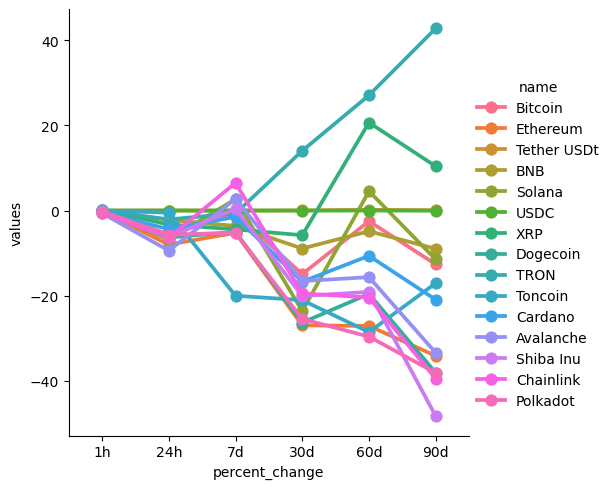

In [77]:
#sns.catplot(x = x-axis, y = y-axis, hue/legend = index, data = df, kind = types)
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [79]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,"59,200.52",2024-08-28 14:56:00.572240
1,Ethereum,"2,464.25",2024-08-28 14:56:00.572240
2,Tether USDt,1.00,2024-08-28 14:56:00.572240
3,BNB,540.53,2024-08-28 14:56:00.572240
4,Solana,147.26,2024-08-28 14:56:00.572240
5,USDC,1.00,2024-08-28 14:56:00.572240
6,XRP,0.57,2024-08-28 14:56:00.572240
7,Dogecoin,0.10,2024-08-28 14:56:00.572240
8,TRON,0.16,2024-08-28 14:56:00.572240
9,Toncoin,5.34,2024-08-28 14:56:00.572240


In [81]:
df9 = df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,"59,200.52",2024-08-28 14:56:00.572240
0,Bitcoin,"59,200.52",2024-08-28 14:56:14.095547
0,Bitcoin,"59,222.94",2024-08-28 14:57:15.147986
0,Bitcoin,"59,221.01",2024-08-28 14:58:15.849478
0,Bitcoin,"59,207.83",2024-08-28 14:59:16.461028
0,Bitcoin,"59,207.83",2024-08-28 15:00:17.127857


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

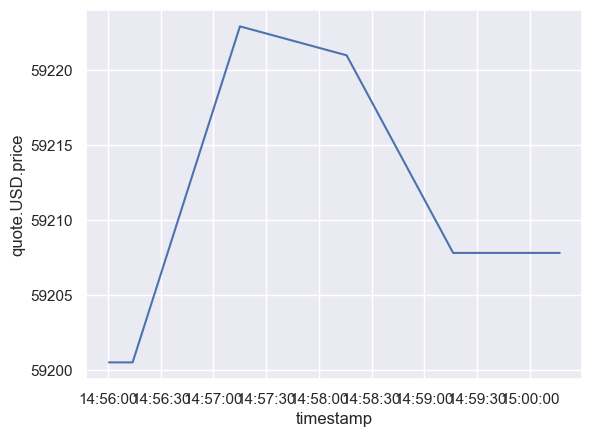

In [83]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)